In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from sklearn.model_selection import train_test_split

import itertools


In [2]:
DEFAULT_LENGTH_Value = 60

In [3]:


# key : value
# uniq_id : [60 values, label]

In [4]:
def format_data(filename, global_data):
    data = pd.read_csv(filename)
    data["TBS_2"] = data["TBS_2"].replace(to_replace = -2, value = 0)
    data["label"] = data["label"].replace(to_replace = "pure_noise", value = "noise")
    data.set_index(pd.to_datetime(data.Time), inplace=True)
    
    id_acquis = data.id_acquisition.iloc[0] # unique for each file
    
    for val in tqdm(data.connection_id.unique()): # for each unique RNTI 
        current_data = data[data.connection_id==val] # We only keep the corresponding values
        label = current_data.label.value_counts(sort = True, ascending =False).index[0]# The label is the most frequent label
        global_data[f"{id_acquis}_{val}"]=(current_data.TBS_1, current_data.TBS_2,label) # We save TBS1, TBS2 and the label
        # With the key id_file + id_RNTI
    
    return global_data

def load_merge_datasets(path_directory) :
    datasets = [i for i in os.listdir(path_directory) if i.endswith(".csv") ]
    global_data = {}
    for i, data in enumerate(datasets) :
        file = os.path.join(path_directory,data)
        print(f"Extracting {file}.... {i+1}/{len(datasets)}")
        global_data = format_data(file, global_data)
         
    return global_data
    

In [5]:
directory_data = "../Mesures/train"


data = load_merge_datasets(directory_data)

Extracting ../Mesures/train\messenger20221117_125310.csv.... 1/33


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 62.43it/s]


Extracting ../Mesures/train\messenger20221124_143112.csv.... 2/33


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 19.12it/s]


Extracting ../Mesures/train\messenger20221124_151137.csv.... 3/33


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.77it/s]


Extracting ../Mesures/train\messenger20221125_130559.csv.... 4/33


100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 46.21it/s]


Extracting ../Mesures/train\messenger20221125_150706.csv.... 5/33


100%|████████████████████████████████████████████████████████████████████████████████| 335/335 [00:06<00:00, 50.38it/s]


Extracting ../Mesures/train\messenger20221129_131204.csv.... 6/33


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:02<00:00,  6.79it/s]


Extracting ../Mesures/train\pure_noise20230106_132210.csv.... 7/33


100%|███████████████████████████████████████████████████████████████████████████████| 839/839 [00:02<00:00, 406.83it/s]


Extracting ../Mesures/train\skype20221129_164105.csv.... 8/33


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.82it/s]


Extracting ../Mesures/train\skype20221206_125510.csv.... 9/33


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 18.49it/s]


Extracting ../Mesures/train\skype20221208_104403.csv.... 10/33


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:03<00:00,  2.23it/s]


Extracting ../Mesures/train\skype20221208_124925.csv.... 11/33


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.44it/s]


Extracting ../Mesures/train\skype20221215_151512.csv.... 12/33


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 21.35it/s]


Extracting ../Mesures/train\skype20221215_155618.csv.... 13/33


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:01<00:00, 14.36it/s]


Extracting ../Mesures/train\skype20221215_164208.csv.... 14/33


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.08it/s]


Extracting ../Mesures/train\skype20221215_174819.csv.... 15/33


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  5.05it/s]


Extracting ../Mesures/train\twitch20221117_113554.csv.... 16/33


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 55.51it/s]


Extracting ../Mesures/train\twitch20221118_075454.csv.... 17/33


100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 27.69it/s]


Extracting ../Mesures/train\twitch20221125_133859.csv.... 18/33


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [00:02<00:00, 37.83it/s]


Extracting ../Mesures/train\twitch20230110_110215.csv.... 19/33


100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 47.67it/s]


Extracting ../Mesures/train\twitch20230110_120513.csv.... 20/33


100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [00:00<00:00, 96.28it/s]


Extracting ../Mesures/train\twitch20230110_130648.csv.... 21/33


100%|███████████████████████████████████████████████████████████████████████████████| 427/427 [00:01<00:00, 275.92it/s]


Extracting ../Mesures/train\youtube20221108_165214.csv.... 22/33


100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 247.23it/s]


Extracting ../Mesures/train\youtube20221108_182416.csv.... 23/33


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 123.02it/s]


Extracting ../Mesures/train\youtube20221124_125524.csv.... 24/33


100%|███████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 459.30it/s]


Extracting ../Mesures/train\youtube20221124_154037.csv.... 25/33


100%|█████████████████████████████████████████████████████████████████████████████████| 92/92 [00:00<00:00, 498.74it/s]


Extracting ../Mesures/train\youtube20221130_103723.csv.... 26/33


100%|█████████████████████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 471.65it/s]


Extracting ../Mesures/train\youtube20230110_145404.csv.... 27/33


100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<00:00, 515.47it/s]


Extracting ../Mesures/train\youtube20230110_161955.csv.... 28/33


100%|█████████████████████████████████████████████████████████████████████████████████| 90/90 [00:00<00:00, 466.49it/s]


Extracting ../Mesures/train\youtube20230112_125508.csv.... 29/33


100%|███████████████████████████████████████████████████████████████████████████████| 108/108 [00:00<00:00, 210.66it/s]


Extracting ../Mesures/train\youtube20230112_151029.csv.... 30/33


100%|█████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 240.71it/s]


Extracting ../Mesures/train\youtube20230112_154749.csv.... 31/33


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 266.02it/s]


Extracting ../Mesures/train\youtube20230112_163634.csv.... 32/33


100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 352.71it/s]


Extracting ../Mesures/train\youtube20230117_095221.csv.... 33/33


100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:01<00:00, 137.18it/s]


In [8]:
def reformat_data(global_data) :
    reformated_data = {}

    for key, value in tqdm(global_data.items()) :
        TBS_1, TBS_2, label = value
       
        current_data = pd.concat([TBS_1, TBS_2],axis=1)
 
        current_data = current_data.resample('s').mean().interpolate()
        if len(current_data)>=DEFAULT_LENGTH_Value :
            
            for i in range(len(current_data)-DEFAULT_LENGTH_Value+1) :
                    current_window = current_data.iloc[i:i+DEFAULT_LENGTH_Value]
                    
                    reformated_data[f"{key}_{i}"]=(current_window.TBS_1, current_window.TBS_2,label)
                    
    

    return reformated_data

In [9]:
reformated_training = reformat_data(data)

100%|██████████████████████████████████████████████████████████████████████████████| 2958/2958 [02:15<00:00, 21.80it/s]


In [10]:
def adapt_to_dataframe(data) :

    futur_df = dict([(key,list(value[0].values)+list(value[1].values) + [value[2]]) for key, value in data.items()])
    futur_df = pd.DataFrame(futur_df).T
    
    futur_df.columns = list(futur_df.columns[:-1])+["label"]
    
    return futur_df

In [11]:
training_data = adapt_to_dataframe(reformated_training)
training_data 

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
20221117_125310_4_0,320.0,914.730159,1509.460317,1245.169231,1546.434783,1308.988235,258.666667,355.060606,451.454545,547.848485,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_1,914.730159,1509.460317,1245.169231,1546.434783,1308.988235,258.666667,355.060606,451.454545,547.848485,644.242424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_2,1509.460317,1245.169231,1546.434783,1308.988235,258.666667,355.060606,451.454545,547.848485,644.242424,740.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_3,1245.169231,1546.434783,1308.988235,258.666667,355.060606,451.454545,547.848485,644.242424,740.636364,837.030303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221117_125310_4_4,1546.434783,1308.988235,258.666667,355.060606,451.454545,547.848485,644.242424,740.636364,837.030303,933.424242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230117_095221_143_13,2628.0,2405.034268,2182.068536,1959.102804,1932.158311,1820.456704,1708.755097,1597.05349,1485.351883,1373.650276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_095221_143_14,2405.034268,2182.068536,1959.102804,1932.158311,1820.456704,1708.755097,1597.05349,1485.351883,1373.650276,1261.948669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_095221_143_15,2182.068536,1959.102804,1932.158311,1820.456704,1708.755097,1597.05349,1485.351883,1373.650276,1261.948669,1150.247062,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_095221_143_16,1959.102804,1932.158311,1820.456704,1708.755097,1597.05349,1485.351883,1373.650276,1261.948669,1150.247062,1038.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube


In [12]:
directory_data_test = "../Mesures/test"

testing_data = adapt_to_dataframe(reformat_data(load_merge_datasets(directory_data_test)))
testing_data

Extracting ../Mesures/test\messenger20221129_151124.csv.... 1/5


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  3.08it/s]


Extracting ../Mesures/test\skype20221206_150902.csv.... 2/5


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:02<00:00,  1.36it/s]


Extracting ../Mesures/test\twitch20221124_163054.csv.... 3/5


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:01<00:00, 10.77it/s]


Extracting ../Mesures/test\youtube20221118_104205.csv.... 4/5


100%|███████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 480.57it/s]


Extracting ../Mesures/test\youtube20230117_121925.csv.... 5/5


100%|████████████████████████████████████████████████████████████████████████████████| 498/498 [00:23<00:00, 20.93it/s]


,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,label
20221129_151124_4_0,366.285714,379.428571,1533.387755,926.877193,862.140351,797.403509,732.666667,617.5,502.333333,387.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221129_151124_4_1,379.428571,1533.387755,926.877193,862.140351,797.403509,732.666667,617.5,502.333333,387.166667,272.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221129_151124_4_2,1533.387755,926.877193,862.140351,797.403509,732.666667,617.5,502.333333,387.166667,272.0,321.481481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221129_151124_4_3,926.877193,862.140351,797.403509,732.666667,617.5,502.333333,387.166667,272.0,321.481481,370.962963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
20221129_151124_4_4,862.140351,797.403509,732.666667,617.5,502.333333,387.166667,272.0,321.481481,370.962963,420.444444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,messenger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230117_121925_263_43,355.158974,457.517949,559.876923,662.235897,764.594872,866.953846,969.312821,1071.671795,1174.030769,1003.989744,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_121925_263_44,457.517949,559.876923,662.235897,764.594872,866.953846,969.312821,1071.671795,1174.030769,1003.989744,833.948718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_121925_263_45,559.876923,662.235897,764.594872,866.953846,969.312821,1071.671795,1174.030769,1003.989744,833.948718,663.907692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube
20230117_121925_263_46,662.235897,764.594872,866.953846,969.312821,1071.671795,1174.030769,1003.989744,833.948718,663.907692,493.866667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,youtube


In [13]:
# Train + Evaluate

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [15]:
model = RandomForestClassifier()
model.fit(training_data[training_data.columns[:-1]], training_data.label)

RandomForestClassifier()

In [16]:
# mesure efficiency
preds_labels =  model.predict(testing_data[testing_data.columns[:-1]])
true_labels = testing_data.label

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap=plt.cm.Blues):
    # This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print('confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [19]:
# compute confusion matrix
cnf_matrix = confusion_matrix(true_labels,preds_labels)
np.set_printoptions(precision=2)
cnf_matrix


array([[   67,    68, 13582,   221,    42],
       [    0,    34,     0,     2,    71],
       [  133,     0, 19687,    30,     0],
       [    6,    70,     0,  9058,   106],
       [  193,  1898,     2,   988,  7962]], dtype=int64)

In [23]:
true_labels

20221129_151124_4_0       messenger
20221129_151124_4_1       messenger
20221129_151124_4_2       messenger
20221129_151124_4_3       messenger
20221129_151124_4_4       messenger
                            ...    
20230117_121925_263_43      youtube
20230117_121925_263_44      youtube
20230117_121925_263_45      youtube
20230117_121925_263_46      youtube
20230117_121925_263_47      youtube
Name: label, Length: 54220, dtype: object

In [24]:
preds_labels

array(['skype', 'skype', 'messenger', ..., 'youtube', 'youtube',
       'messenger'], dtype=object)

In [20]:
list(true_labels.unique())


['messenger', 'skype', 'twitch', 'youtube', 'noise']

In [21]:
list(training_data.label.unique())

['messenger', 'noise', 'skype', 'twitch', 'youtube']

normalized confusion matrix


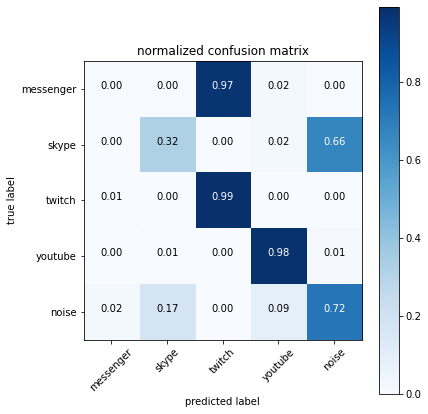

In [22]:
# plot normalized confusion matrix
plt.figure(figsize=(6, 6))
class_names = list(true_labels.unique())
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='normalized confusion matrix')

plt.show()

In [8]:
list_labels = [i[2] for i in global_data.values()]
distrib = dict((x,list_labels.count(x)) for x in set(list_labels))
distrib

{'youtube': 10512,
 'twitch': 40181,
 'messenger': 89526,
 'noise': 8808,
 'skype': 161624}

In [116]:
labels_glob

array(['messenger', 'messenger', 'messenger', ..., 'youtube', 'youtube',
       'youtube'], dtype='<U9')

In [119]:

labels_glob = np.array(list_labels)
import sklearn.preprocessing
import numpy as np
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_one_hot_encoded = label_binarizer.fit_transform(labels_glob)

label_one_hot_encoded

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [120]:
TBS_values = np.array([np.transpose([i[0].values,i[1].values]) for i in  global_data.values()])
TBS_values.shape

(310651, 60, 2)

In [121]:
X_train_val, X_test, y_train_val, y_test = train_test_split(TBS_values, label_one_hot_encoded, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [122]:
#images_train, _ = tuple(zip(*train))
#images_train = np.concatenate(images_train)
#images_train.shape

In [184]:
train_labels_not_encoded = label_binarizer.inverse_transform(y_train)
class_weights = class_weight.compute_class_weight(class_weight ='balanced',
                                                  classes =np.unique(train_labels_not_encoded), y =train_labels_not_encoded)
class_weights = dict(zip(np.unique(np.argmax(y_train,axis=1)), class_weight.compute_class_weight(class_weight ='balanced',
                                                  classes =np.unique(train_labels_not_encoded),
                                                               y =train_labels_not_encoded)))

layer_normalization = tf.keras.layers.Normalization(axis=None, input_shape=(length_values,2))
layer_normalization.adapt(X_train)


In [185]:
a

{0: 0.6930966598858193,
 1: 7.015675855197609,
 2: 0.38506001695239656,
 3: 1.5437716958380532,
 4: 5.885817776539426}

In [186]:
class_weights

{0: 0.6930966598858193,
 1: 7.015675855197609,
 2: 0.38506001695239656,
 3: 1.5437716958380532,
 4: 5.885817776539426}

In [187]:
#X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)

In [193]:
model = Sequential()
model.add(layer_normalization)
model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D()) #Adding a convultion layer

model.add(Conv1D(64, 5, activation='relu'))
model.add(MaxPool1D()) #

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(distrib.keys()), activation='sigmoid'))




In [194]:
#Conv 1 : output_shape= (None, length_values-5+1,32)    (None, 56,32)
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics =['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normalizat  (None, 60, 2)            3         
 ion)                                                            
                                                                 
 conv1d_31 (Conv1D)          (None, 56, 32)            352       
                                                                 
 max_pooling1d_30 (MaxPoolin  (None, 28, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_32 (Conv1D)          (None, 24, 64)            10304     
                                                                 
 max_pooling1d_31 (MaxPoolin  (None, 12, 64)           0         
 g1D)                                                            
                                                     

In [196]:

checkpoint_filepath = '/tmp/checkpoint/best_model'
logs_dir = 'tmp/logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, save_weights_only=True, monitor='val_accuracy',  mode='max',save_best_only=True)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
hist = model.fit(X_train,y_train, epochs =20, 
                 validation_data = (X_val,y_val),
                 callbacks =[tensorboard_callback, early_stop,model_checkpoint_callback],
                class_weight=class_weights
                )

model.load_weights(checkpoint_filepath)

Epoch 1/20
6602/6602 [==============================] - 62s 9ms/step - loss: 0.1597 - accuracy: 0.7674 - val_loss: 0.1714 - val_accuracy: 0.7925
Epoch 2/20
6602/6602 [==============================] - 67s 10ms/step - loss: 0.1370 - accuracy: 0.7834 - val_loss: 0.1704 - val_accuracy: 0.8044
Epoch 3/20
6602/6602 [==============================] - 62s 9ms/step - loss: 0.1232 - accuracy: 0.7944 - val_loss: 0.1668 - val_accuracy: 0.8065
Epoch 4/20
6602/6602 [==============================] - 62s 9ms/step - loss: 0.1125 - accuracy: 0.8041 - val_loss: 0.1599 - val_accuracy: 0.8179
Epoch 5/20
6602/6602 [==============================] - 63s 10ms/step - loss: 0.1032 - accuracy: 0.8138 - val_loss: 0.1696 - val_accuracy: 0.8021
Epoch 6/20
6602/6602 [==============================] - 61s 9ms/step - loss: 0.0990 - accuracy: 0.8170 - val_loss: 0.1615 - val_accuracy: 0.8094
Epoch 7/20
6602/6602 [==============================] - 61s 9ms/step - loss: 0.0938 - accuracy: 0.8240 - val_loss: 0.1451 - val_

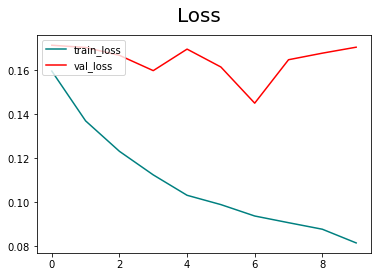

In [197]:
fig =plt.figure()
plt.plot(hist.history['loss'], color ='teal', label ='train_loss')
plt.plot(hist.history['val_loss'], color ='red', label ='val_loss')
#plt.plot(hist.history['val_loss'], color= 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc ="upper left")
plt.show()

# Evaluate on the test dataset

In [198]:
class_names= label_binarizer.inverse_transform(np.identity(5))

def plot_confusion_matrix(cm, classes, normalize=False, title='confusion matrix', cmap=plt.cm.Blues):
    # This function prints and plots the confusion matrix. Normalization can be applied by setting `normalize=True`
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print('confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [199]:
# mesure efficiency
preds_labels =  model.predict(X_test)
preds_labels = label_binarizer.inverse_transform(preds_labels)

1457/1457 [==============================] - 6s 4ms/step


In [200]:
true_labels = label_binarizer.inverse_transform(y_test)


normalized confusion matrix


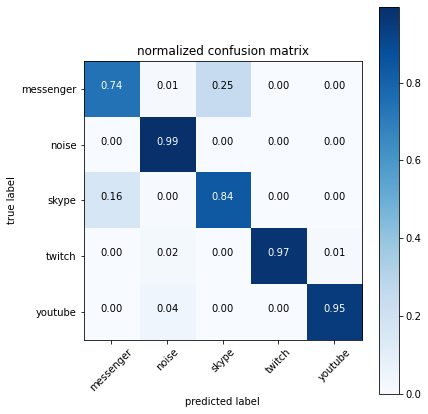

In [201]:
 


# compute confusion matrix
cnf_matrix = confusion_matrix(true_labels,preds_labels)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='normalized confusion matrix')

plt.show()

# Evaluate on the whole dataset

In [202]:
# mesure efficiency
preds_labels =  model.predict(TBS_values)
preds_labels = label_binarizer.inverse_transform(preds_labels)

9708/9708 [==============================] - 10848s 1s/step


In [203]:

true_labels = label_binarizer.inverse_transform(label_one_hot_encoded)


normalized confusion matrix


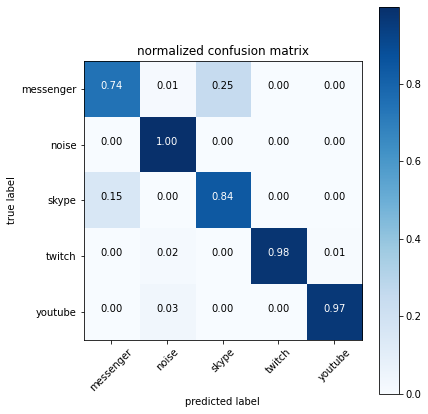

In [204]:
# compute confusion matrix
cnf_matrix = confusion_matrix(true_labels,preds_labels)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='normalized confusion matrix')

plt.show()